In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import configparser

config_path = '../scraping/config.ini'

config = configparser.ConfigParser()
config.read(config_path, encoding='utf-8')

section = config['statistikDaten']

cities_string = section.get('staedte', '')
staedte = [city.strip() for city in cities_string.split(',') if city.strip()]

print(staedte)


['Chemnitz', 'Dortmund', 'Nuremberg', 'Saarbrücken', 'Erfurt', 'Munich']


In [24]:
#Datei einlesen 
df = pd.read_csv('../../Data/raw/EUDA_Wasserwerk2020-24/Wasserwerk2020-2024.csv', sep=',')

In [25]:
#Deutsche Städte filtern 
Deutschland=df[df['Country']=='DE']
Deutschland=Deutschland.reset_index(drop=True)
print(Deutschland)

     Year       Metabolite Country             City  Wednesday  Thursday  \
0    2020  methamphetamine      DE         Chemnitz     351.61    339.16   
1    2020  methamphetamine      DE         Dortmund       0.00      0.00   
2    2020  methamphetamine      DE          Dresden     212.24    159.72   
3    2020  methamphetamine      DE           Dülmen       0.00      0.00   
4    2020  methamphetamine      DE           Erfurt     440.02    429.13   
..    ...              ...     ...              ...        ...       ...   
139  2024          cocaine      DE        Magdeburg     174.74    186.10   
140  2024          cocaine      DE         Munich G     511.37    402.66   
141  2024          cocaine      DE        Nuremberg      71.81     80.20   
142  2024          cocaine      DE  Saarbrücken (2)     219.95    267.09   
143  2024          cocaine      DE        Stuttgart     361.61    406.06   

     Friday  Saturday  Sunday  Monday  Tuesday  Weekday mean  Weekend mean  \
0    337.

In [29]:
#relevante Städte 

alle_staedte=[]

#Drogen (Metabolite, Cocaine & Methamphetamine) zu einer Datei zusammenfügen
def drogen(): 
    for stadt_name in staedte:
        stadt_df = Deutschland[Deutschland['City'].str.startswith(stadt_name)]
        drogen_df = stadt_df[stadt_df['Metabolite'].isin(['cocaine', 'methamphetamine'])].copy()
        drogen_sum = drogen_df.groupby(['Year','City'])['Daily mean'].sum().reset_index()

        drogen_sum.to_csv(f'../../Data/processed/wasser_cleaning/{stadt_name}/{stadt_name}.csv', sep=';', index=False)

        alle_staedte.append(drogen_sum)
    return alle_staedte
drogen()

#alle Jahre und Städte zu einer Datei zusammenfügen 
gesamt_df = pd.concat(alle_staedte)
tabelle_fromat = gesamt_df.pivot(index='Year', columns='City', values='Daily mean')
tabelle_fromat.to_csv('../../Data/processed/wasser_cleaning/alle_staedte.csv', sep=';') 

print(alle_staedte)

[   Year      City  Daily mean
0  2020  Chemnitz      356.29
1  2021  Chemnitz      103.20
2  2022  Chemnitz      306.62
3  2023  Chemnitz      404.10
4  2024  Chemnitz      419.48,    Year      City  Daily mean
0  2020  Dortmund      305.04
1  2021  Dortmund      478.59
2  2022  Dortmund      352.89
3  2023  Dortmund      547.65
4  2024  Dortmund      480.76,    Year       City  Daily mean
0  2020  Nuremberg      161.80
1  2021  Nuremberg      130.55
2  2022  Nuremberg      194.27
3  2023  Nuremberg      271.59
4  2024  Nuremberg      266.79,    Year             City  Daily mean
0  2020  Saarbrücken (2)      167.51
1  2021  Saarbrücken (2)      209.10
2  2022  Saarbrücken (2)      195.67
3  2023  Saarbrücken (2)      246.52
4  2024  Saarbrücken (2)      287.88,    Year    City  Daily mean
0  2020  Erfurt      506.30
1  2021  Erfurt      193.70
2  2022  Erfurt      304.72
3  2023  Erfurt      454.46
4  2024  Erfurt      453.56,    Year      City  Daily mean
0  2020  Munich G      200.6

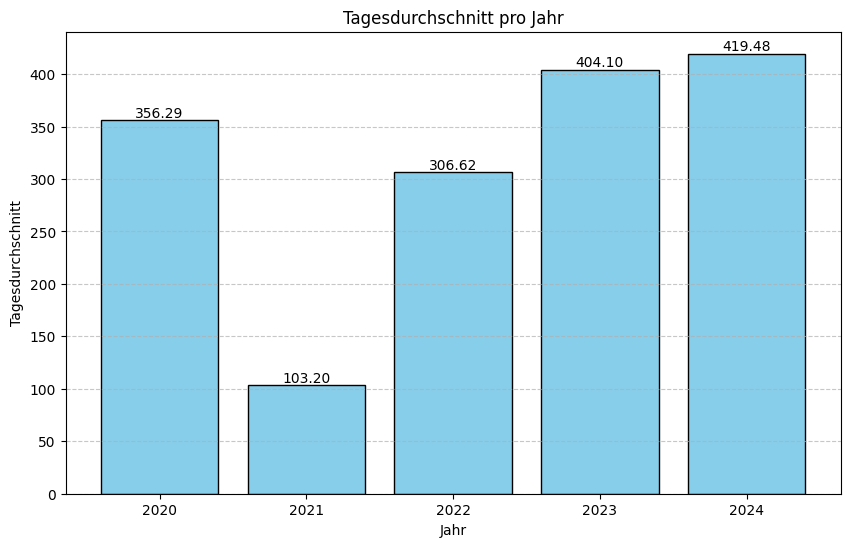

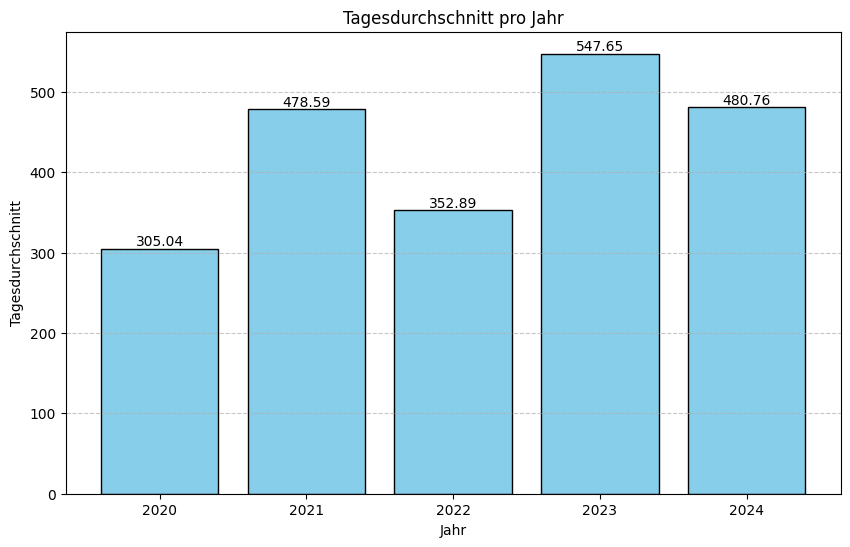

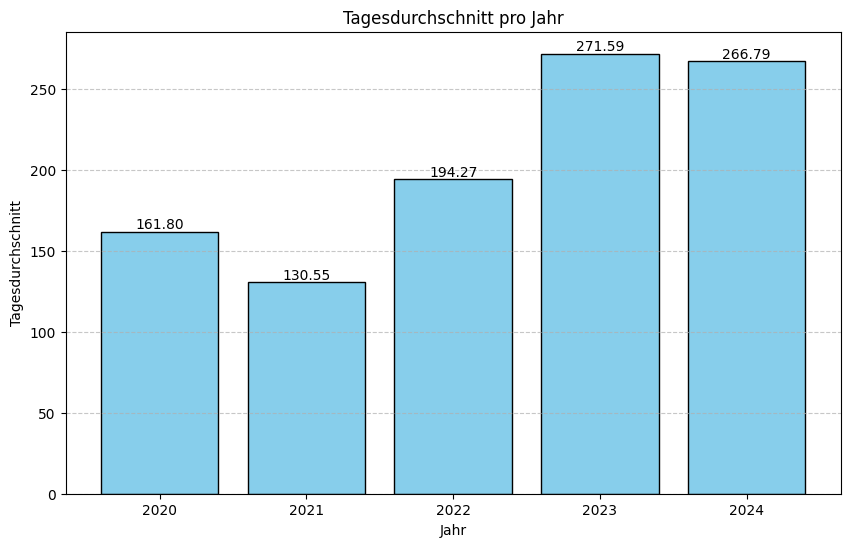

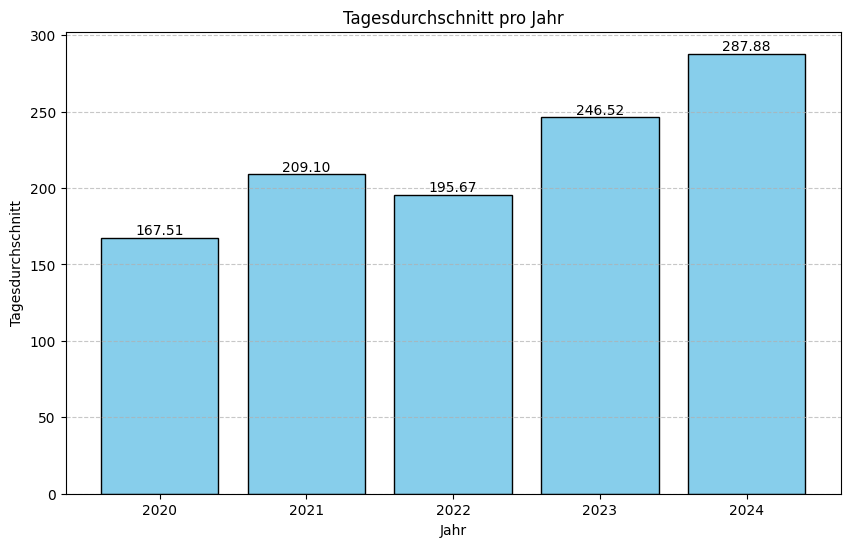

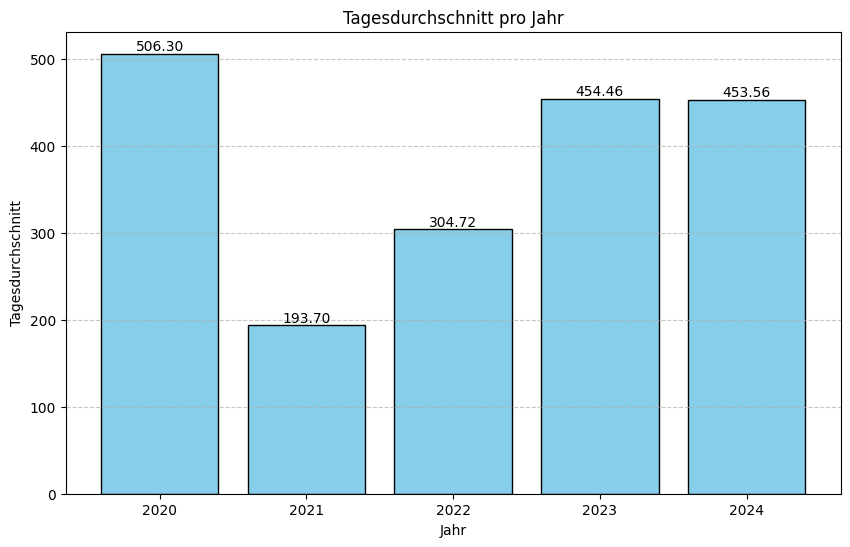

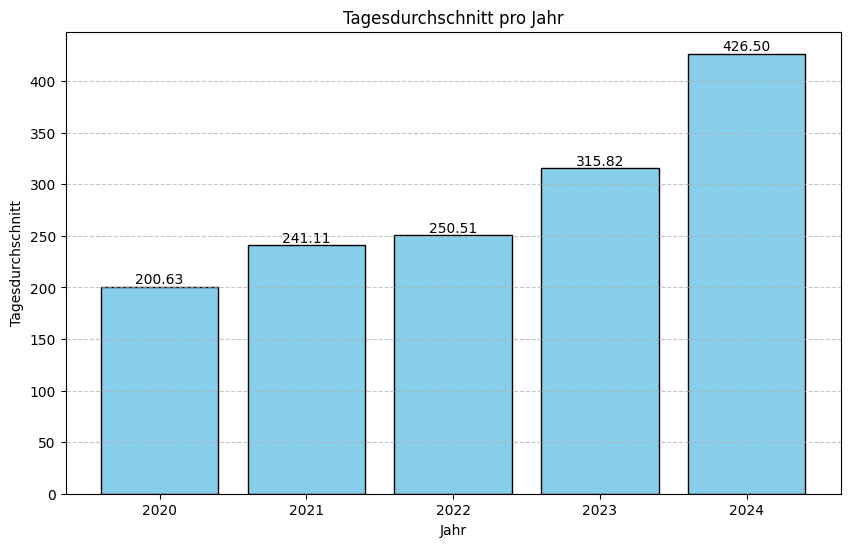

In [28]:
#alle Städte als Balkendiagramm darstellen 
for stadt_name in staedte:
    df = pd.read_csv(f'../../Data/processed/wasser_cleaning/{stadt_name}/{stadt_name}.csv', sep=';')

    plt.figure(figsize=(10, 6))
    bars = plt.bar(df['Year'], df['Daily mean'], color='skyblue', edgecolor='black')

    # Beschriftungen hinzufügen
    plt.xlabel('Jahr')
    plt.ylabel('Tagesdurchschnitt')
    plt.title('Tagesdurchschnitt pro Jahr')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(df['Year'])

    # Werte über den Balken anzeigen
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom')
        plt.savefig(f'../../Data/processed/wasser_cleaning/{stadt_name}/{stadt_name}Diagramm.png', dpi=300, bbox_inches='tight')

    plt.show()